In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
datafile=pyart.io.read('MDV-20150805-143535-PPIVol.nc')
print(datafile.fields.keys())
datafile.info('compact')

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV'])
altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (9270,)>
elevation: <ndarray of type: float32 and shape: (9270,)>
fields:
	DBZH: <ndarray of type: float32 and shape: (9270, 2500)>
	DBZV: <ndarray of type: float32 and shape: (9270, 2500)>
	VELH: <ndarray of type: float32 and shape: (9270, 2500)>
	VELV: <ndarray of type: float32 and shape: (9270, 2500)>
fixed_angle: <ndarray of type: float32 and shape: (18,)>
instrument_parameters:
	frequency: <ndarray of type: float32 and shape: (1,)>
	pulse_width: <ndarray of type: float32 and shape: (9270,)>
	prt_mode: <ndarray of type: |S1 and shape: (18, 10)>
	prt: <ndarray of type: float32 and shape: (9270,)>
	prt_ratio: <ndarray of type: float32 and shape: (9270,)>
	polarization_mode: <ndarray of type: |S1 and shape: (18, 10)>
	nyquist_velocity: <ndarray of type: float32 and shape: (9270,)>
	n_samples: <ndarray

In [3]:
z=datafile.fields['DBZH']['data']
print(np.shape(z))                                 ## Calculate rain rate
b=1.4
a=300
R=(z/a)**(1/b)
np.shape(R)

(9270, 2500)


(9270, 2500)

In [4]:
delta_z=datafile.fields['DBZH']['data']-datafile.fields['DBZV']['data']
DZ=delta_z

In [5]:
mask_dict = {'data': R, 'units': 'mm/hr', 'long_name': 'rain rate',
             '_FillValue': R.fill_value, 'standard_name': 'R'}
datafile.add_field('R',mask_dict)

In [6]:
mask_dict = {'data': DZ, 'units': 'dBZ', 'long_name': 'Difference',
             '_FillValue': delta_z.fill_value, 'standard_name': 'DZ'}
datafile.add_field('DZ',mask_dict)

In [7]:
datafile.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV', 'R', 'DZ'])

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:256: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  warnings.warn("No projection was defined for the axes."
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


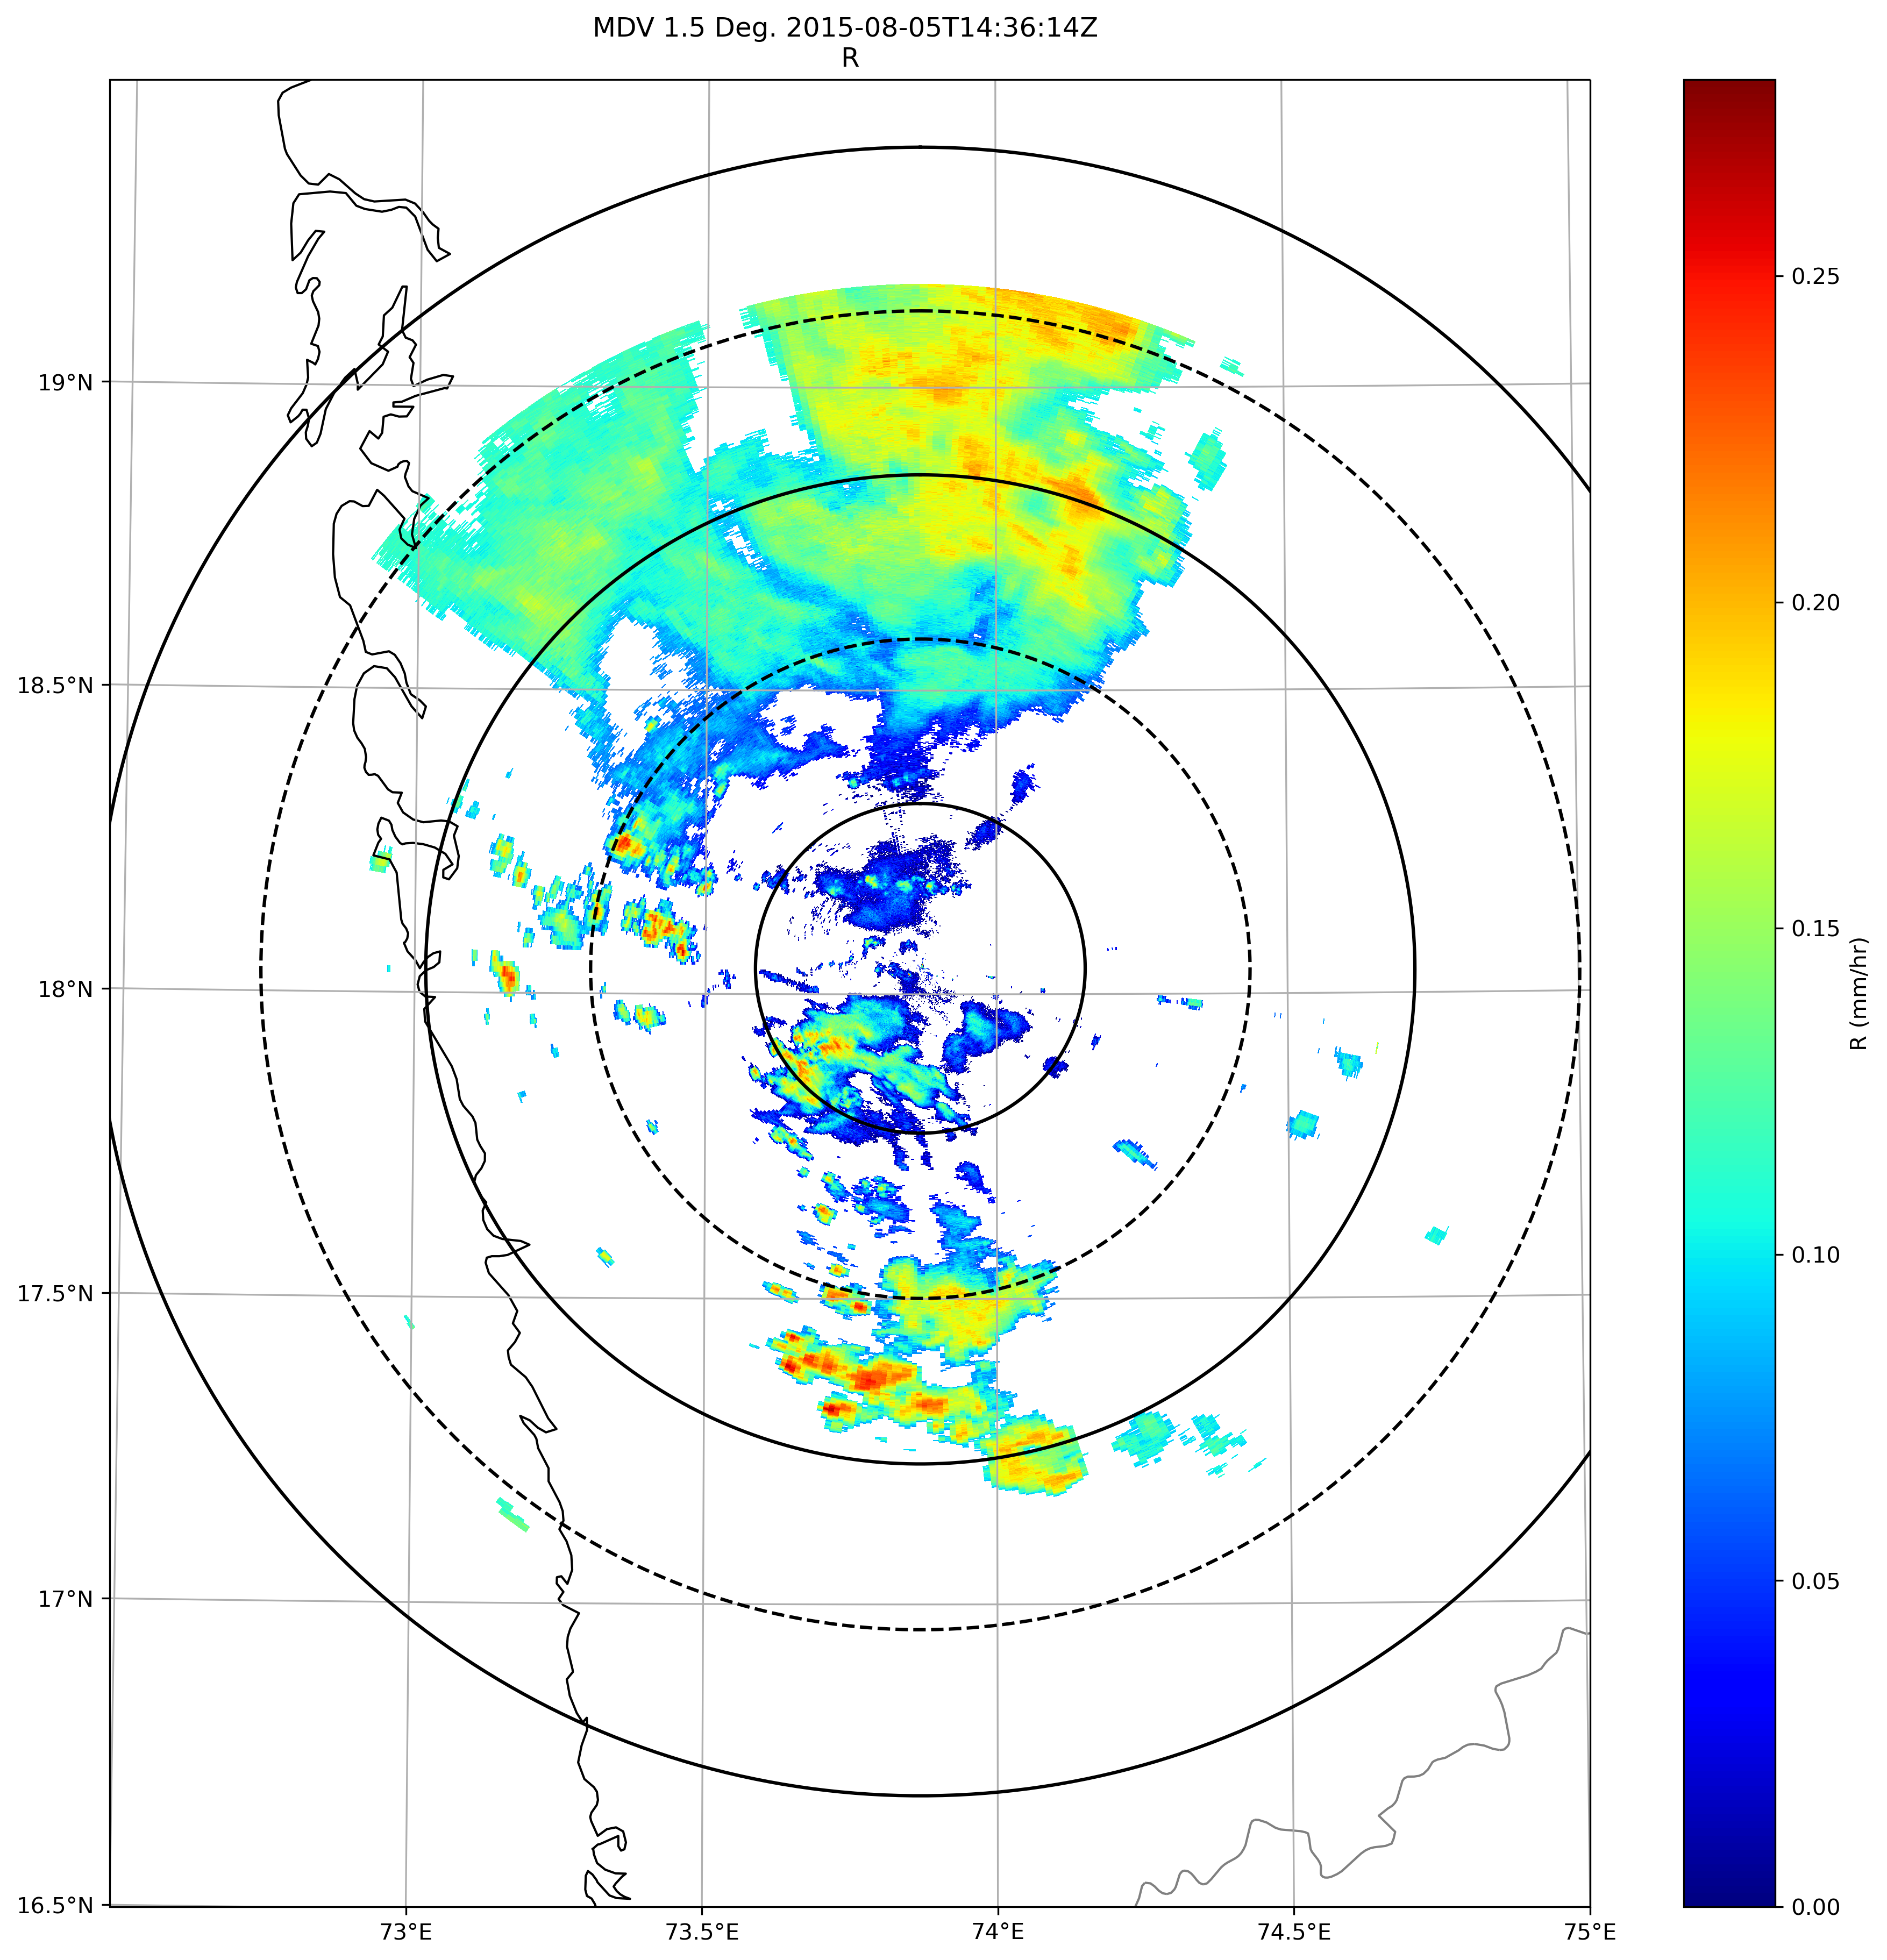

In [9]:
fig = plt.figure(figsize=(15,15),dpi=300)
display = pyart.graph.RadarMapDisplay(datafile)
display.plot_ppi_map('R',1, min_lon=72.5, max_lon=75, min_lat=16.5, max_lat=19.5,
                     lon_lines=np.arange(72,75.5, .5), resolution='10m',
                     lat_lines=np.arange(16.5,19.5, .5),
                     fig=fig, lat_0=datafile.latitude['data'][0],
                     lon_0=datafile.longitude['data'][0],cmap='jet')

display.plot_range_ring(30., line_style='k-',markersize=2)
display.plot_range_ring(60., line_style='k--')
display.plot_range_ring(90., line_style='k-')
display.plot_range_ring(120., line_style='k--')
display.plot_range_ring(150., line_style='k-')

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:256: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  warnings.warn("No projection was defined for the axes."
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


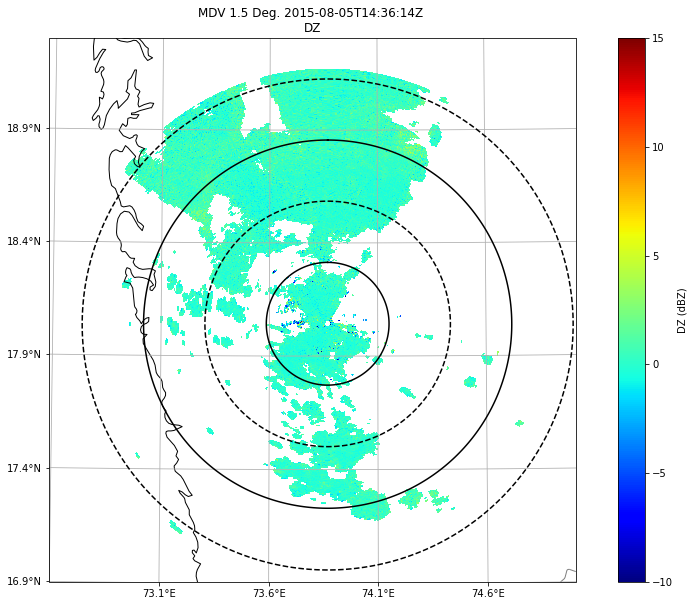

In [10]:
fig = plt.figure(figsize=(15,10))
display = pyart.graph.RadarMapDisplay(datafile)
display.plot_ppi_map('DZ',1, vmin=-10, vmax=15, min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5),
                     fig=fig, lat_0=datafile.latitude['data'][0],
                     lon_0=datafile.longitude['data'][0],cmap='jet')

display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(60., line_style='k--')
display.plot_range_ring(90., line_style='k-')
display.plot_range_ring(120., line_style='k--')

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:256: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  warnings.warn("No projection was defined for the axes."
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


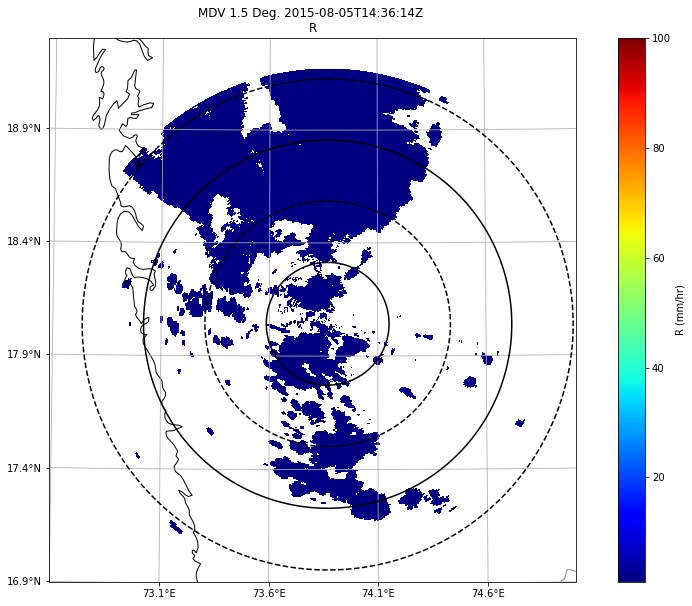

In [11]:
fig = plt.figure(figsize=(15,10))
display = pyart.graph.RadarMapDisplay(datafile)
display.plot_ppi_map('R',1, vmin=1, vmax=100, min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5),
                     fig=fig, lat_0=datafile.latitude['data'][0],
                     lon_0=datafile.longitude['data'][0],cmap='jet')

display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(60., line_style='k--')
display.plot_range_ring(90., line_style='k-')
display.plot_range_ring(120., line_style='k--')